<a name="top"> <h1>01.Explanatory Data Analisis and Variable Selection </h1> <a>

<p>Geospatial Analysis of the 2023 Earthquakes in Turkey<br />
<strong>Master Thesis</strong><br />
<strong>Master of Data Science</strong></p>


<p style="text-align:right">Gozde Yazganoglu (<em>gozde.yazganoglu@cunef.edu</em>)</p>

<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Introduction](#1)
1. [Importing libraries](#2)
1. [Reading the data and Profiling](#3)
1. [Variables](#4)
1. [Visualization of the result of geostatistical data interpolation](#5)
1. [Saving data for other notebooks](#6)

## 1. Introduction <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In the previous notebook we have collected data and created some geographic variables. In this notebook we will have first glance as if we do in all data projects. 

Pandas-profiling is a great library to have a broad glance on the data frame and have some initial insights. It gives us quite a lot information including distinct variables, variable type, null and duplicate variables etc. Later we are going to examine important columns and have some more insight.

## 2. Importing libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In this notebook we are using new_geo_env.yaml. In order to run local this file should be installed.

We will use some functions from aux_func that is also in this repository.Below we import also the necessary ones.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle   
import numpy as np
import seaborn as sns
#from pandas_profiling import ProfileReport
import contextily as ctx
import fiona
from aux_func import data_summary, save_data, plot_continuous_for_damage_level, remove_duplicates, plot_for_damage_level, sanitize_string_values

## 3. Reading the Data and Profiling <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In the previous notebook we have gathered the data from several sources. Since the data size is big and contain geo columns it might take time to read it. Alternatively in the previous notebook we have already save also in pickle format. Pickle file should also work in the same way but since this is a python specific file format, this file cannot be read in other languages or could be used softwares such as ArcGIS or QGIS.

In [6]:
#reading geojson data from newly created processed folder
data = gpd.read_file('../data/processed/dataset.geojson')

data.head()

obj_type     name                       info  \
0      11-Residential Buildings  Unknown         997-Not Applicable   
1      11-Residential Buildings  Unknown         997-Not Applicable   
2  12-Non-residential Buildings  Unknown  1251-Industrial buildings   
3  12-Non-residential Buildings  Unknown  1251-Industrial buildings   
4      11-Residential Buildings  Unknown         997-Not Applicable   

          damage_gra            det_method        notation  or_src_id  \
0  No visible damage  Photo-interpretation  Building block          1   
1  No visible damage  Photo-interpretation  Building block          1   
2  No visible damage  Photo-interpretation  Building block          1   
3  No visible damage  Photo-interpretation  Building block          1   
4  No visible damage  Photo-interpretation  Building block          1   

   dmg_src_id        cd_value            real  ...  fertility hh_size  \
0           3  Not Applicable  Not Applicable  ...       2.36     4.0   
1           3  Not Applicable  Not Applicable  ...       2.36     4.0   
2           3  Not Applicable  Not Applicable  ...       2.36     4.0   
3           3  Not Applicable  Not Applicable  ...       2.36     4.0   
4           3  Not Applicable  Not Applicable  ...       2.36     4.0   

   longitude   latitude nearest_water_source_distance  \
0  38.314252  37.768867                      0.077874   
1  38.313284  37.768690                      0.076904   
2  38.318013  37.768612                      0.081336   
3  38.318677  37.768575                      0.081953   
4  38.312542  37.768514                      0.076146   

  nearest_camping_distance  nearest_earthquake_distance  \
0                 0.020232                     1.121897   
1                 0.019284                     1.121020   
2                 0.023588                     1.125574   
3                 0.024196                     1.126222   
4                 0.018542                     1.120359   

   nearest_fault_distance   elev  \
0                0.016935  660.0   
1                0.017440  660.0   
2                0.014585  660.0   
3                0.014241  660.0   
4                0.017826  660.0   

                                            geometry  
0  POLYGON ((38.31461 37.76919, 38.31480 37.76871...  
1  POLYGON ((38.31327 37.76841, 38.31297 37.76834...  
2  POLYGON ((38.31832 37.76898, 38.31826 37.76822...  
3  POLYGON ((38.31898 37.76892, 38.31893 37.76819...  
4  POLYGON ((38.31286 37.76831, 38.31243 37.76819...  

[5 rows x 39 columns]

With below code, we create an HTML report that could be found in ('../data/processed/primary_analisis.html') in order to avoid executing all the time below it is commented.

In [7]:
#creating a pandas profile in order to have a broad look on the dataset.
#geometric data does not appear in pandas profile, so we will have to look at it separately.
#df = pd.DataFrame(data)
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile


In [8]:
#saving profile report to html file

#profile.to_file('../data/processed/primary_analisis.html')

As might be seen in the Pandas report as well, some of the features of the dataframe are not very useful and we have never yet processed them. These variables can be listed as follows.

    * det_method
    * notation
    * cd_value
    * real
    * index_right
    * esmr_id
    * glide_no
    * map_type

Before advancing with further analysis, we can eliminate these variables. This is because they either do not provide meaningful information, contain identical information across all data entries, or hold non-informative values like 'none' or 'not applicable'.






In [9]:
#Droping columns that are not needed for the analysis
data.drop(columns=['det_method', 'notation','cd_value', 'real', 'index_right','emsr_id', 'glide_no', 'map_type'], inplace=True)



Upon further examination of the report, it becomes apparent that several variables exhibit a high degree of correlation with one another. This phenomenon is likely attributed to the inclusion of various socioeconomic variables specific to each municipality in our dataset. 

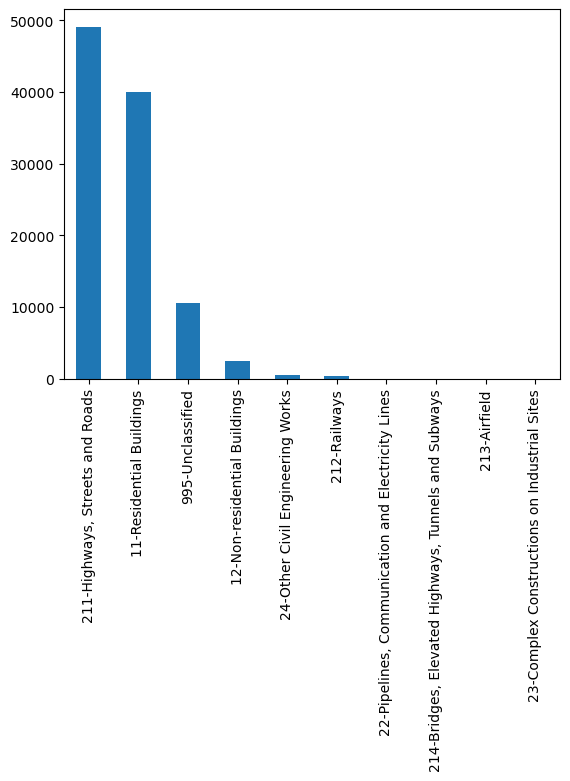

In [10]:
%matplotlib inline
data['obj_type'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [11]:
#showing prppperties of data using data_summary function from aux_func.py
data_info = data_summary(data)
data_info

Column     Dtype  Missing  Missing Percentage  \
0                        obj_type    object        0            0.000000   
1                            name    object       10            0.009703   
2                            info    object        0            0.000000   
3                      damage_gra    object        0            0.000000   
4                       or_src_id     int64        0            0.000000   
5                      dmg_src_id     int64        0            0.000000   
6                         area_id    object        0            0.000000   
7                        locality    object        0            0.000000   
8                      population     int64        0            0.000000   
9                          income     int64        0            0.000000   
10                    total_sales     int64        0            0.000000   
11                   second_sales     int64        0            0.000000   
12                   water_access   float64        0            0.000000   
13                      elec_cons     int64        0            0.000000   
14                  building_perm     int64        0            0.000000   
15                  land_permited     int64        0            0.000000   
16                  labour_fource   float64        0            0.000000   
17                   unemployment   float64        0            0.000000   
18                   agricultural     int64        0            0.000000   
19                      life_time   float64        0            0.000000   
20                   hb_per100000     int64        0            0.000000   
21                      fertility   float64        0            0.000000   
22                        hh_size   float64        0            0.000000   
23                      longitude   float64        0            0.000000   
24                       latitude   float64        0            0.000000   
25  nearest_water_source_distance   float64        0            0.000000   
26       nearest_camping_distance   float64        0            0.000000   
27    nearest_earthquake_distance   float64        0            0.000000   
28         nearest_fault_distance   float64        0            0.000000   
29                           elev   float64        0            0.000000   
30                       geometry  geometry        0            0.000000   

    Distinct Count  
0               10  
1             5082  
2               52  
3                5  
4                6  
5                4  
6               19  
7               19  
8               17  
9                7  
10              19  
11              19  
12               4  
13               7  
14               8  
15               8  
16               4  
17               4  
18               8  
19               8  
20               8  
21               8  
22               9  
23           98600  
24           98567  
25           98670  
26           98670  
27           98670  
28           98670  
29             123  
30           98671

Since we have created data different sources and by merging, and we have removed other colums that doesn't have a lot of information we don't have any missing values. However,as infered a good amount of entries are duplicated. We choose to remove duplicated variables. Here we use another function from aux_func

In [12]:

#removing duplicates with the function remove_duplicates

data = remove_duplicates(data)

Before removing duplicates, number of rows:  103063
After removing duplicates, number of rows:  98795


## 3. Variables <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)




### 1. obj_type, name, info:

The variables presented categorize the buildings, providing various levels of detail. For instance, the 'name' attribute tends to contain more nuanced information (as is the case with identifying a building as a school), whereas the 'obj_type' attribute generally offers less granularity in its classification. The anticipation is that these variables may have a high degree of correlation. Incorporating all of them in our model could potentially lead to multicollinearity or overfitting issues. It's crucial to approach this with care to ensure the integrity and reliability of our model's results.

info category seems to have variables that are wrongly created. To keep this we will manipulate the data and align with the building code and its value.

### 2. damage_gra : 

This variable is the target variable. Using geographic and socioeconomic variables, we can analyze how buildings behaved after the earthquake. According to pandas profile report we can see that this is an unbalanced variable that most of the buildings, facilities or roads are not damaged.

In order this variable to be used in any algorithm we should change it to numerical form. the level of damage can be clasified as ordinal categoric variable. 

### 3. dmg_src_id, or_src_id :

These variables are not meaningful and not explained in detail. It is infered as they are identifying variables, we do not need them in machine learning models.

### 4. locality, area_id :

Variables that explain the local we are observing. Both are them has 19 different locals as we are examining these areas. Both should be clasified as categoric variables. area_id is identifying variable.


### 5. Variables that were received from Turkstat:

More detailed info could be found in previous notebook. Data is added in the previous notebook manually. Some of the values are belong to province mean, therefore more than one locality might have the same score.

    population: Population of 2022
    income: Income in USD for 2022
    total_sales : total house sales in the last 5 years
    second_sales : second hand house sales in the las 5 years ( this might be interesting because these buildings expectedto be more risky than the new ones)
    water_access : percentage of access to city water
    elec_cons : electric consumption of per capita
    building_perm: number of buildings permited
    land_perm : land permited in the province in m2
    labour_fource: labour force participation rate in the local 2022
    unemployment : uneployment rate 2022
    agricultural : agricultural area in decares.
    life_time : expected lifetime
    hb_per1000000 : hospital beds in the province per 100000
    fertility : fertility rate
    hh_size : average household size in the area


### 6. Geospatial Variables:

Variables with a geographical significance include latitude and longitude, which are derived from either points or the center of a polygonal structure. The BallTree method is employed to compute the Euclidean distance for distance-related variables. In models like ours that are geographically-based, if we suspect that any of these might influence the outcome, we can compute these variables as done before.

We utilize longitude and latitude data as location markers for our dataset. Using this method, these metrics help determine the nearest distance to various points. It's essential to understand that this isn't an actual distance, but rather offers us an insight.



### Manipulations to data:

Upon insights we gathered from profiling, "info" variable has grouped in sometimes only numbers and sometimes number with the type of the building. It is important for us to understand the which building types has been damaged more than others. Therefore ewe want to keep it and we want to map it with the corrections.

Target variable damage_gra is a ordinal type of data. perhaps we can transform it with later preprocessing. Right we need to encode it to create some visualizations.


In [13]:
# Manipulations to the data:

#to info variable:

map_info = {'122':'122-Office buildings',
       '123':'123-Wholesale and retail trade buildings',
       '1251':'1251-Industrial buildings',
       '1263':'1263-School, university and research buildings',
       '1272':'1272-Hospital buildings',
       '1279':'1279-Military',
       '1280':'1280-Cemetery',
       'None' :'997-Not Applicable' }

data.info = data['info'].replace(map_info, inplace=True)

# to the target variable:
map_damage_gra = {'Damaged': 3,
                  'Destroyed': 4,
                  'No visible damage' : 1,
                  'Not Analysed': 0,
                  'Possibly damaged':2 }

data['damage_gra'] = data['damage_gra'].replace(map_damage_gra)


data.drop(columns = ['name', 'area_id', 'or_src_id', 'dmg_src_id'], inplace = True)


# cleaning and upper casing string data (this process saves us a cleaning in later algorithms.)


columns_to_sanitize= ['obj_type', 'info','locality']

data = sanitize_string_values(data, columns_to_sanitize)
                      


accorrding to building types

In [14]:
#makeing a list of categorical variables of interest
variables_of_interest = ['obj_type', 'info', 'locality']

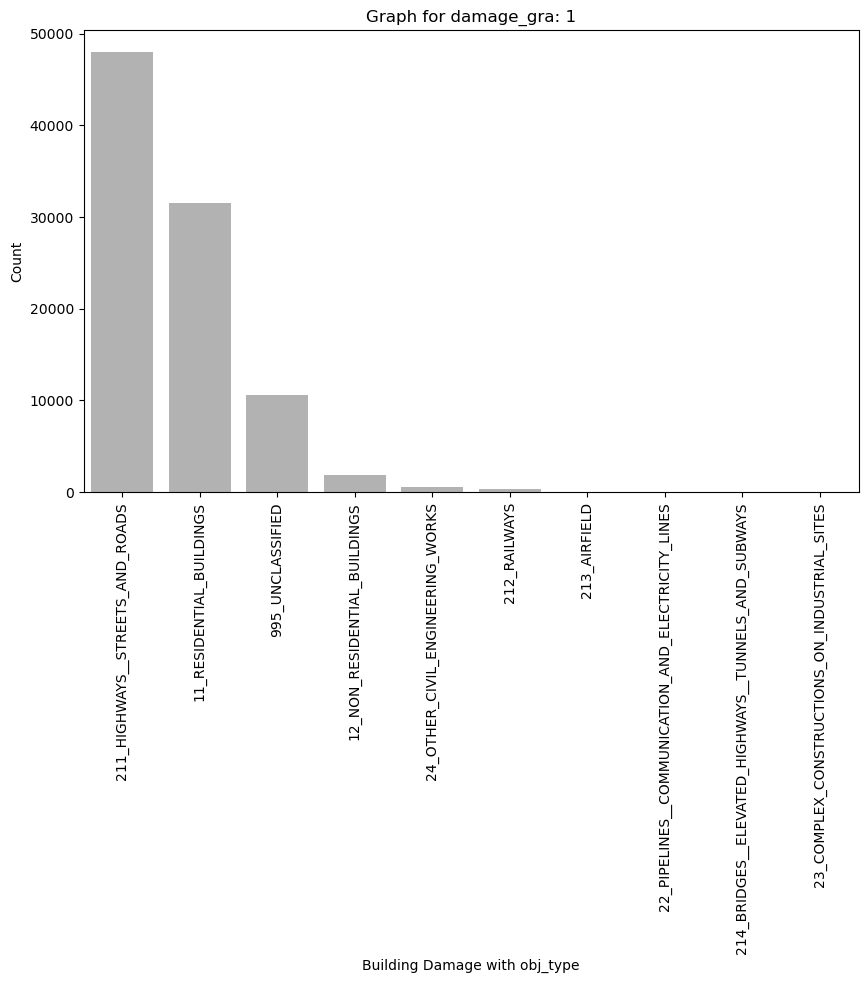

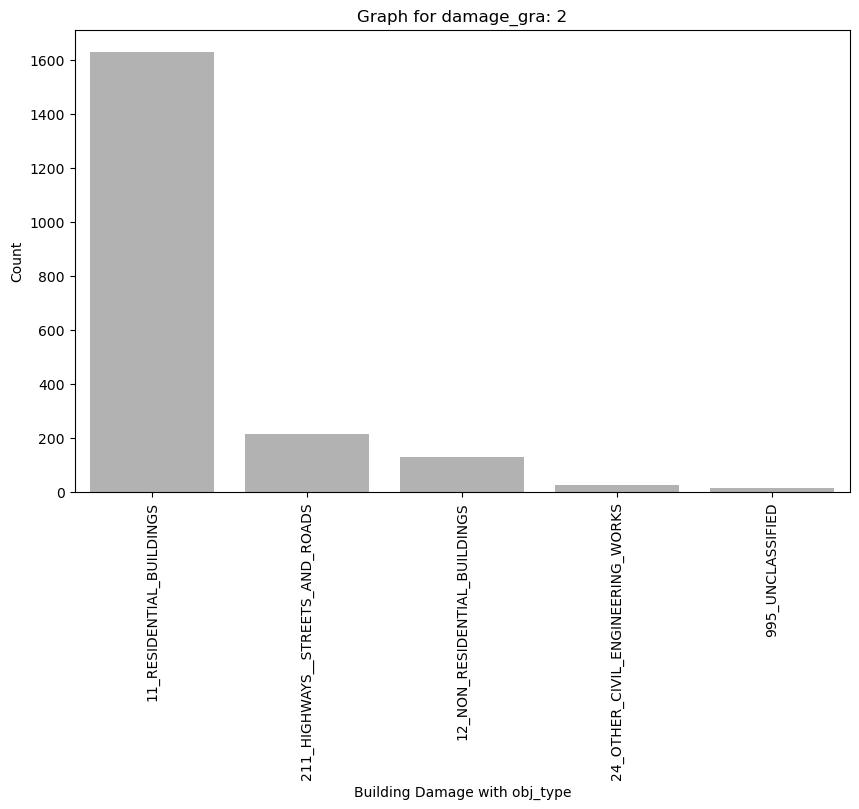

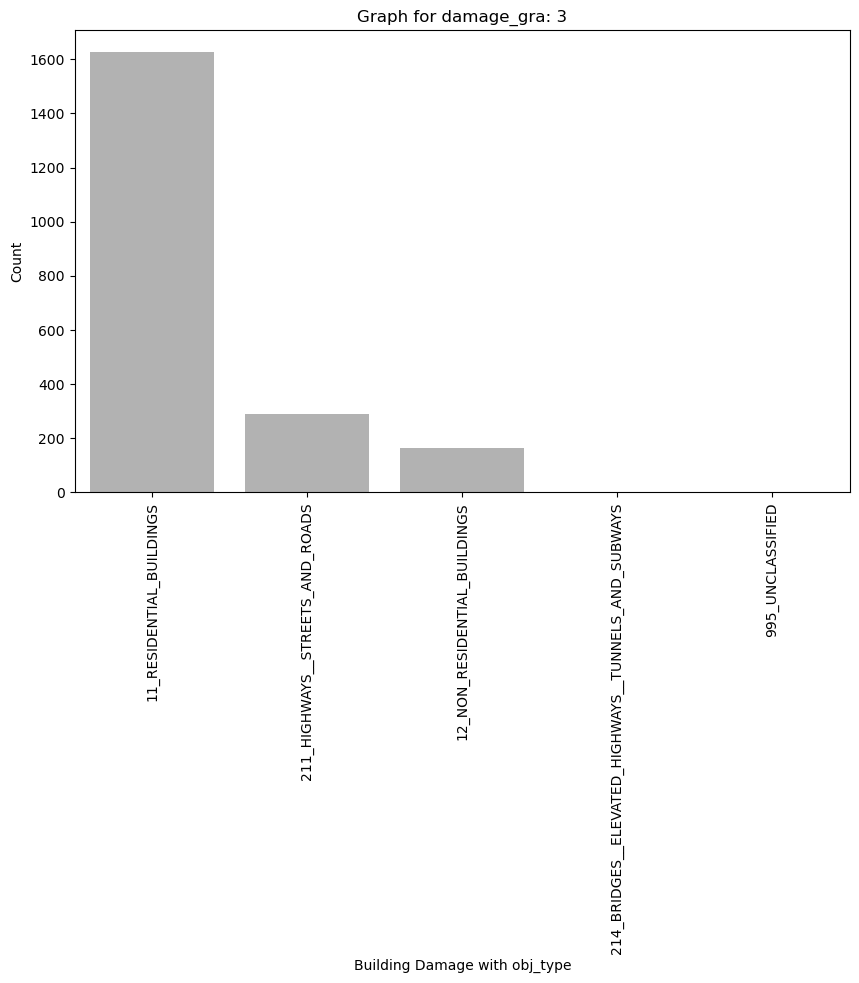

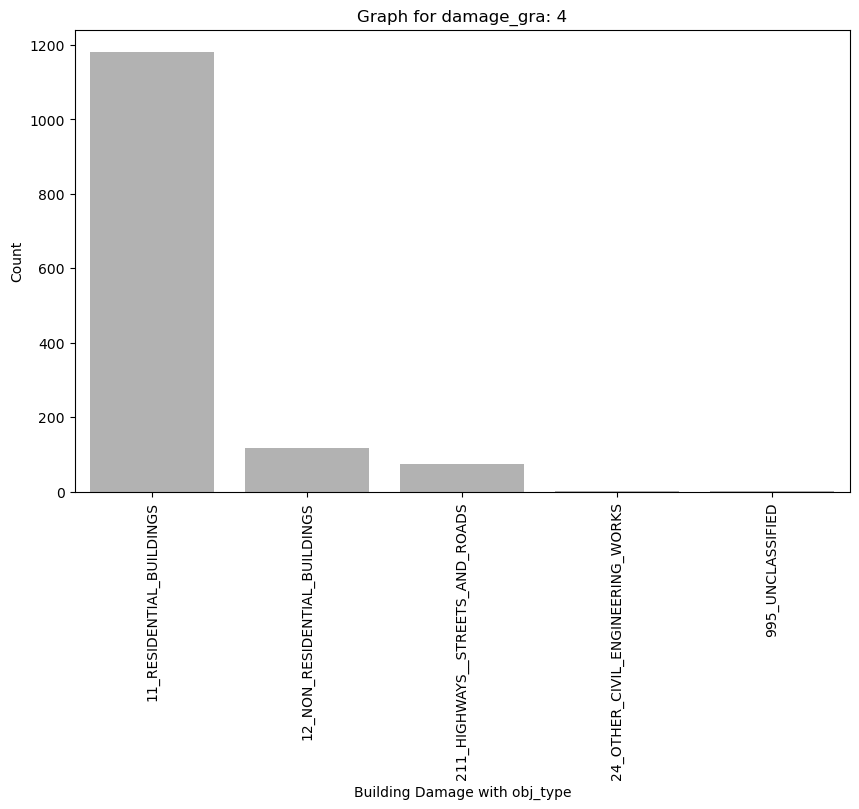

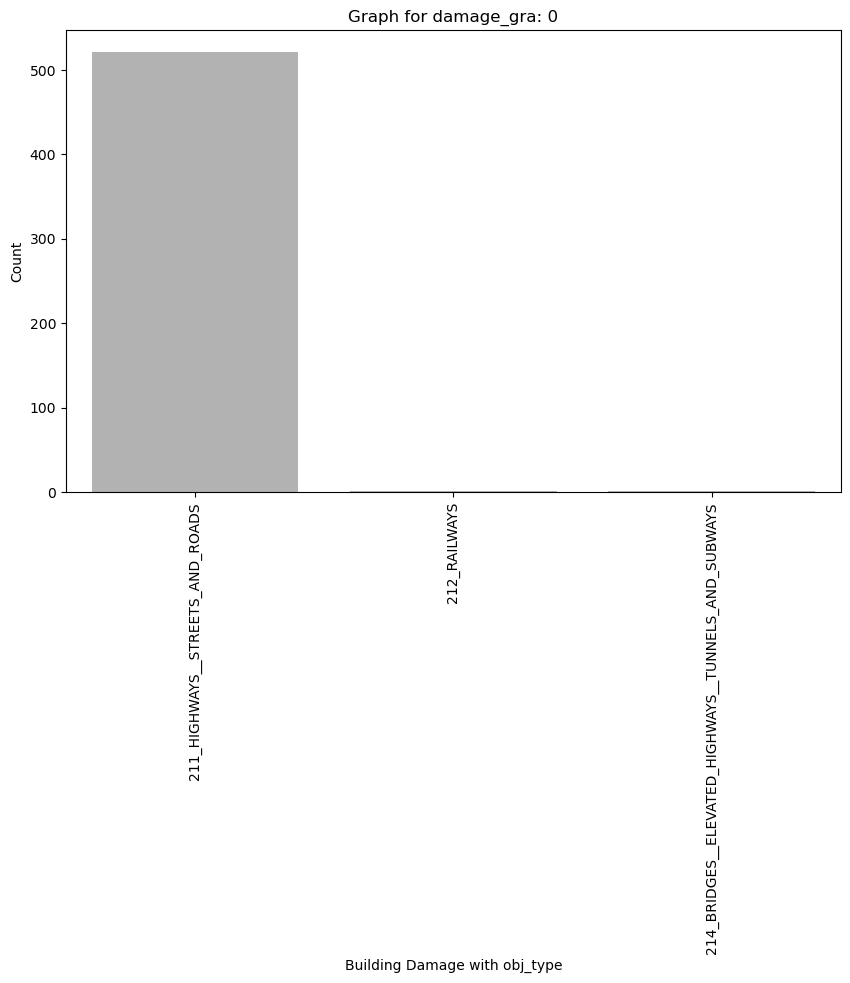

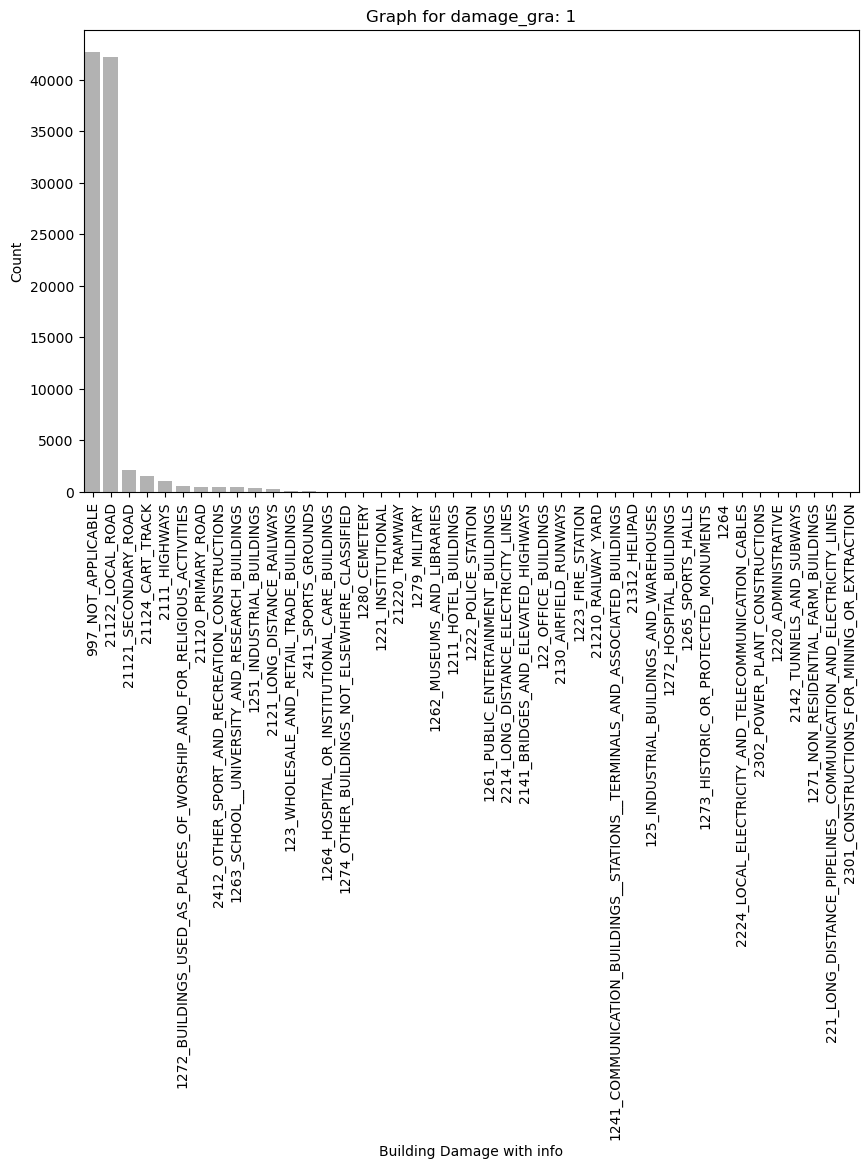

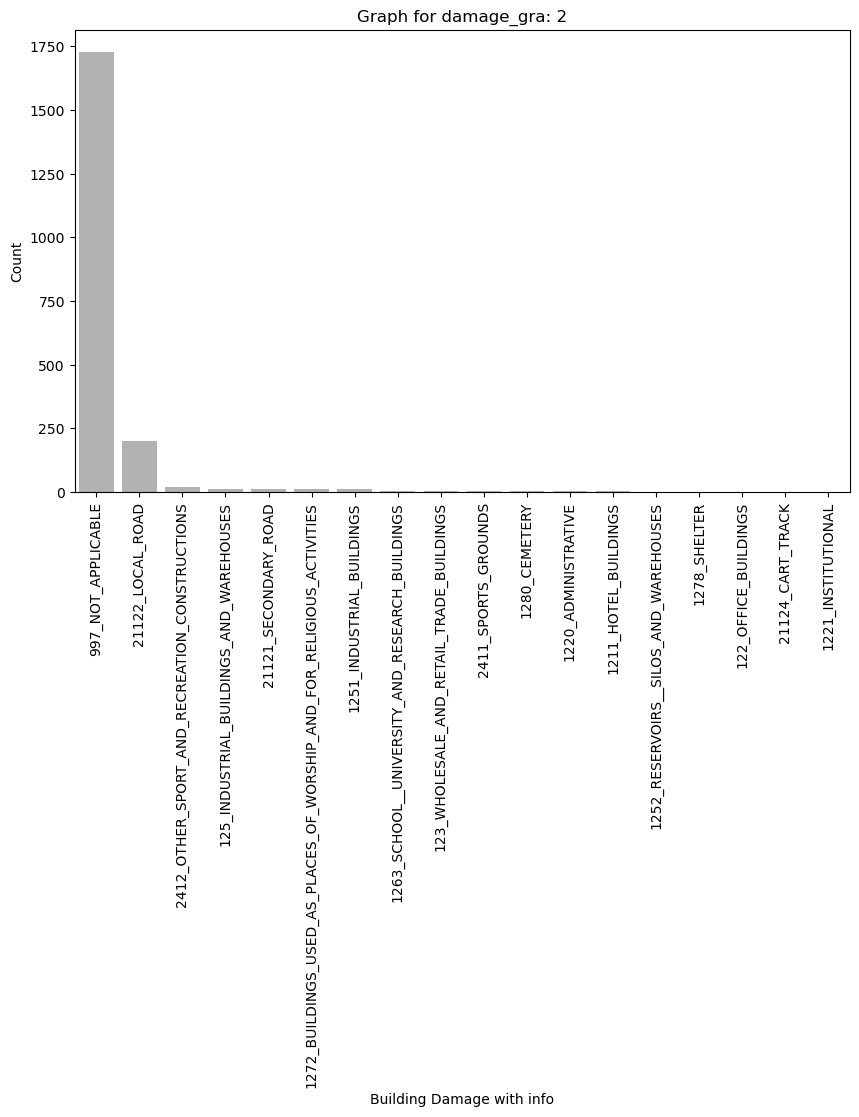

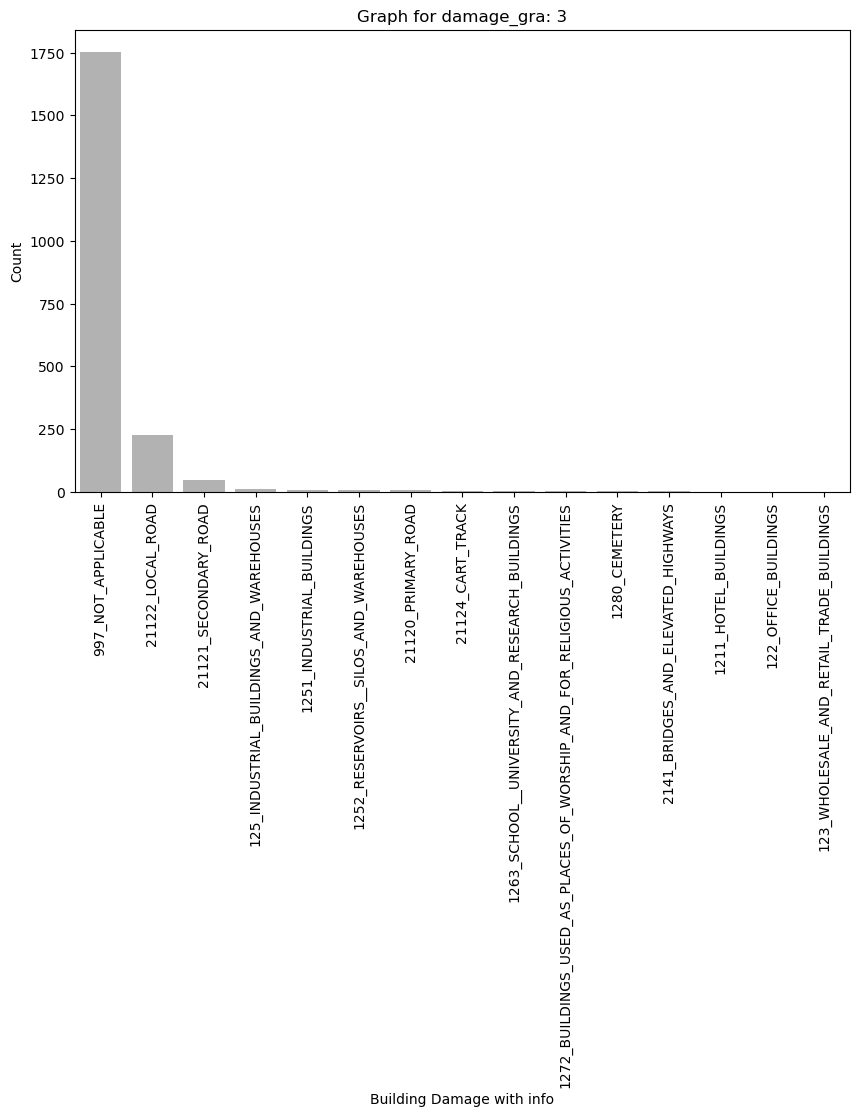

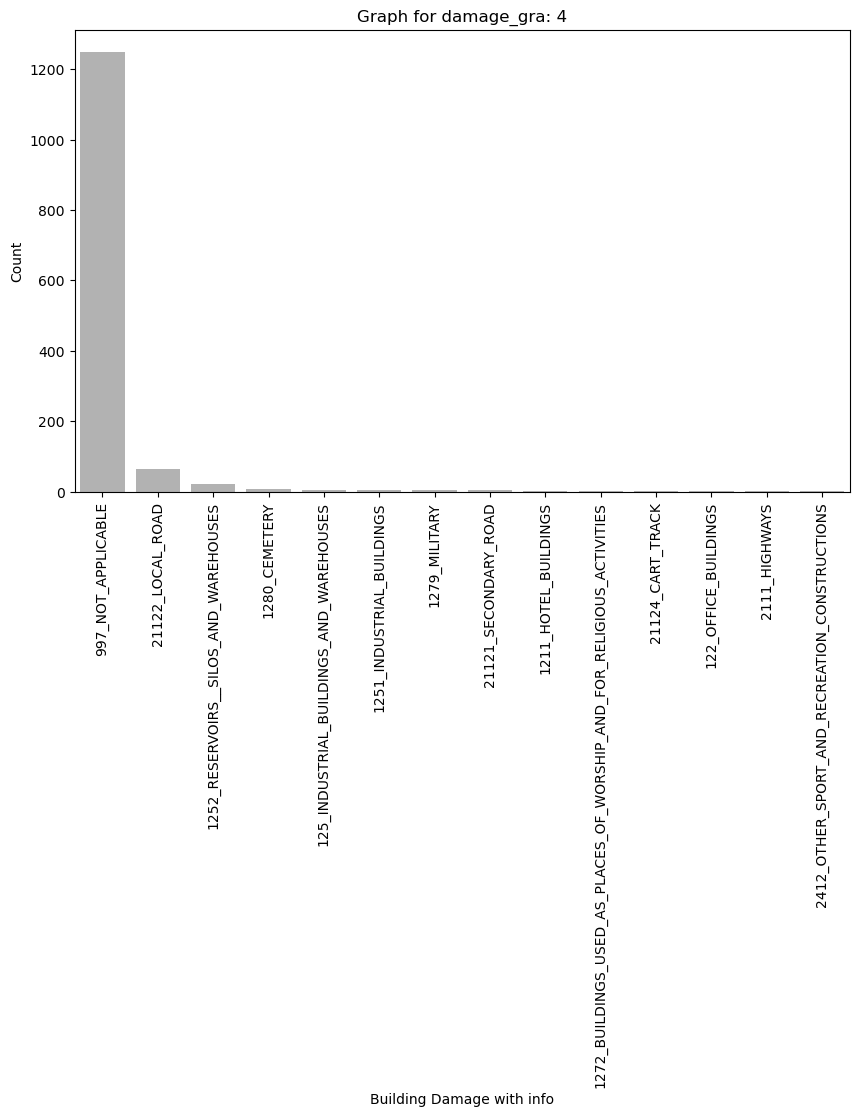

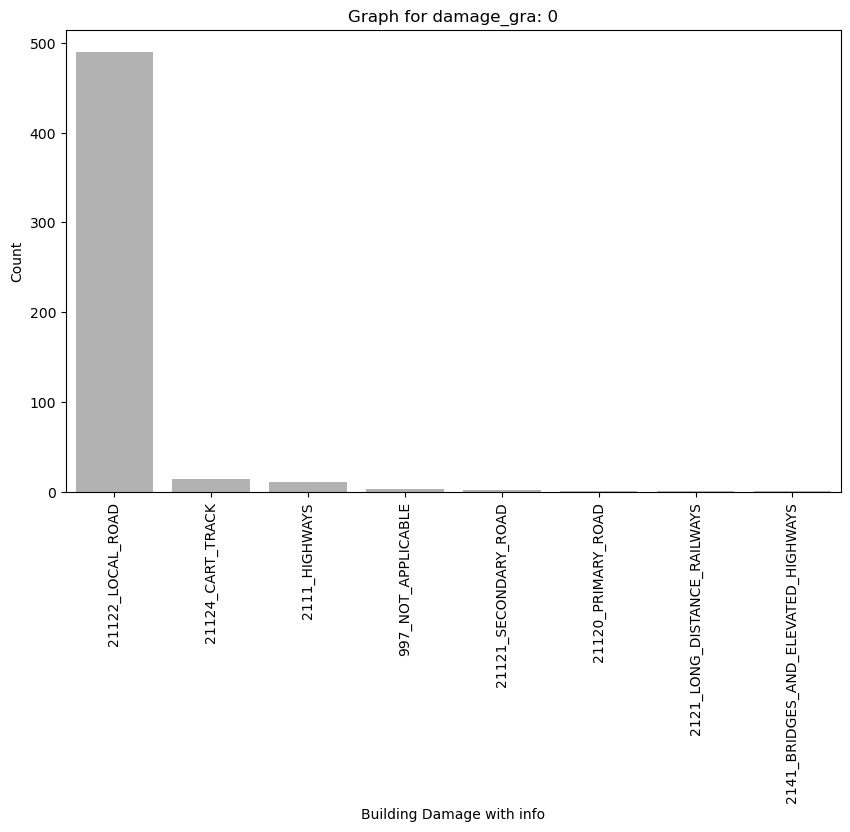

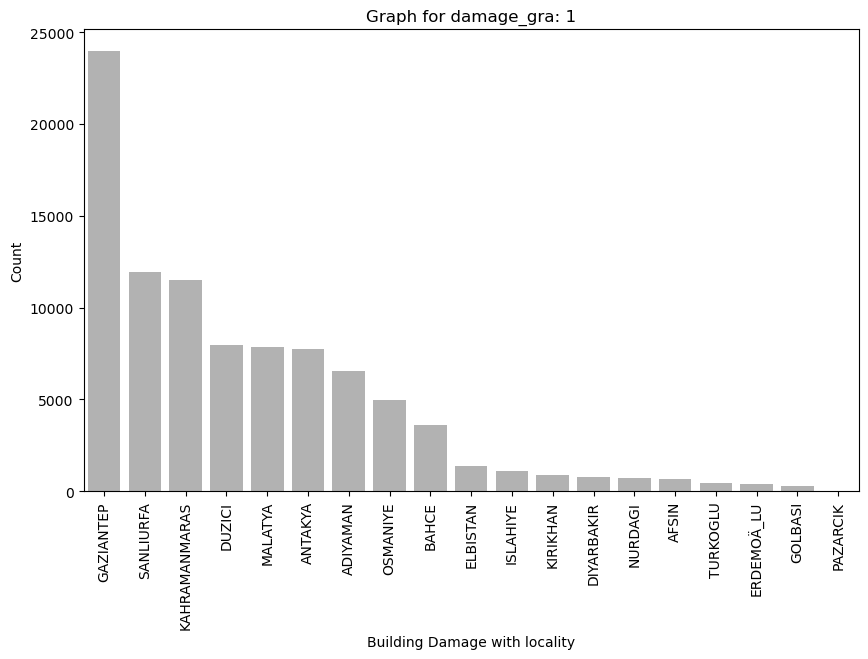

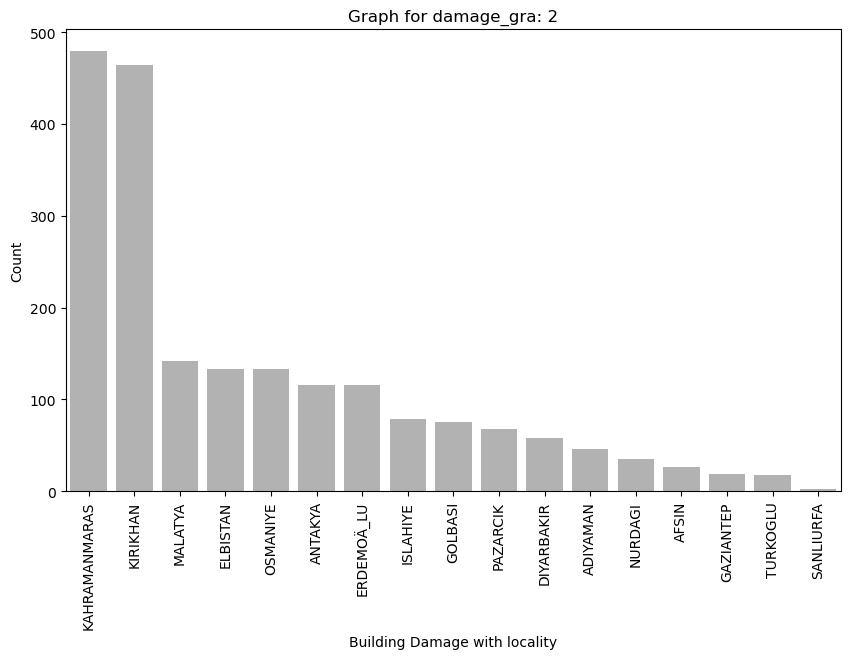

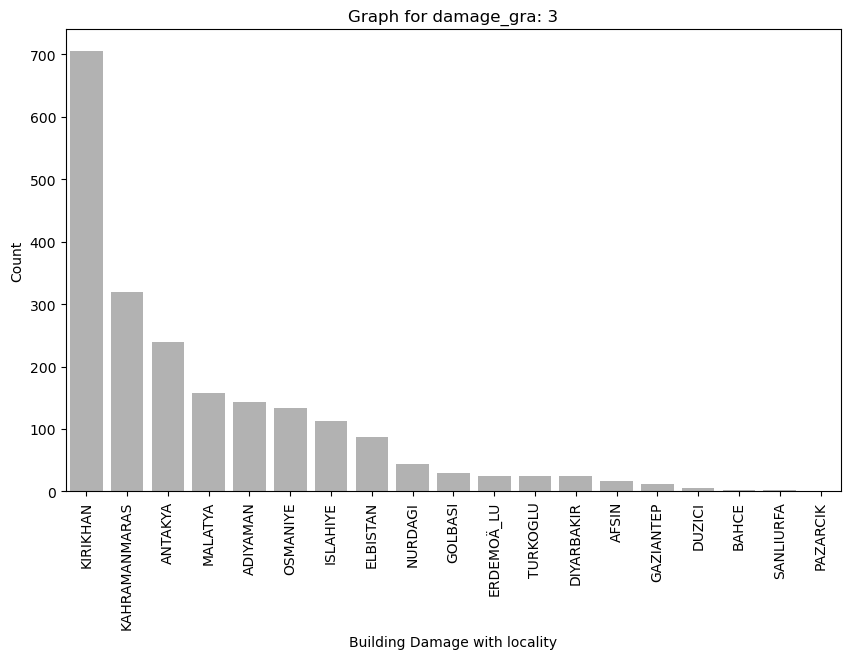

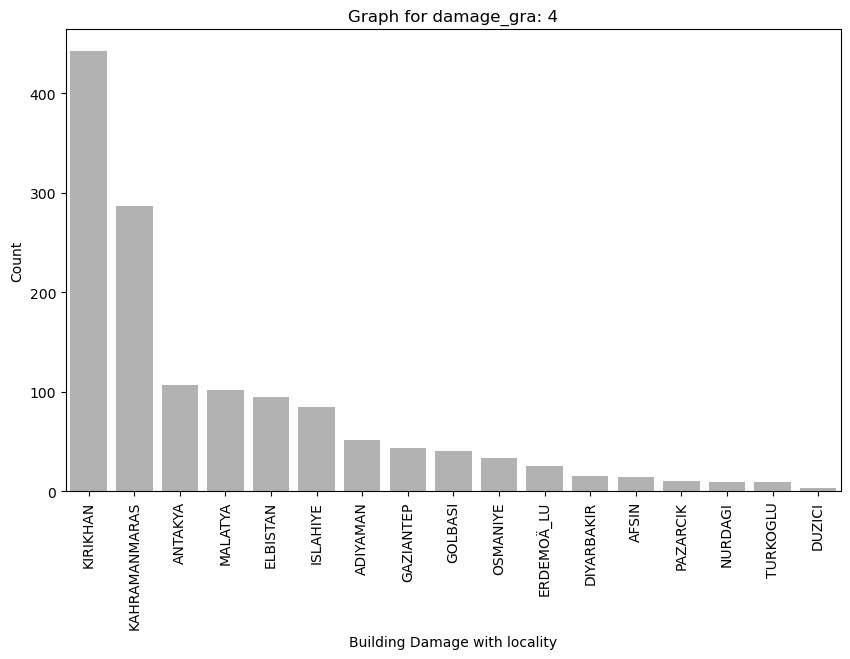

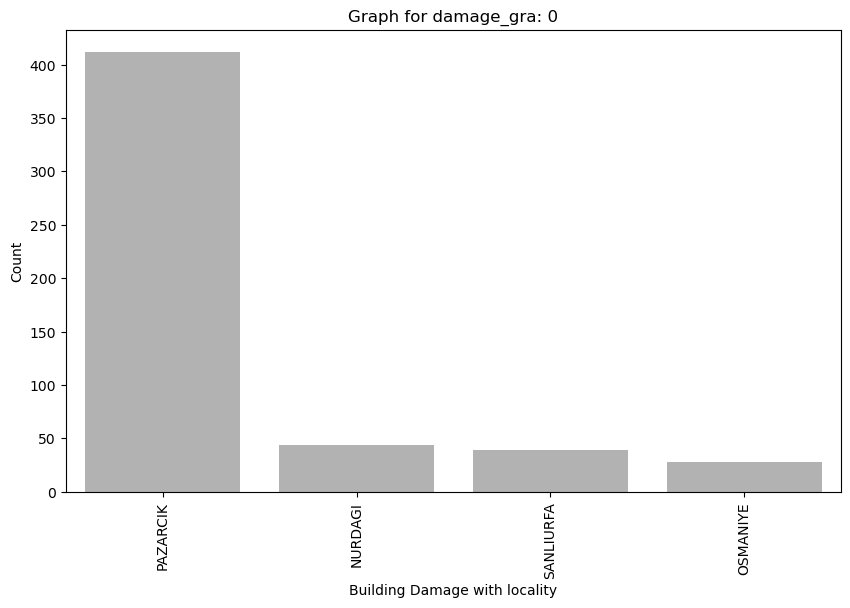

In [15]:
#using plot_damage_level function  we graph categorical variables
for variable in variables_of_interest:
    plot_for_damage_level(data, variable, 'damage_gra')
    

As seen in the graphs, roads are the group of building that have deteriorated the most.

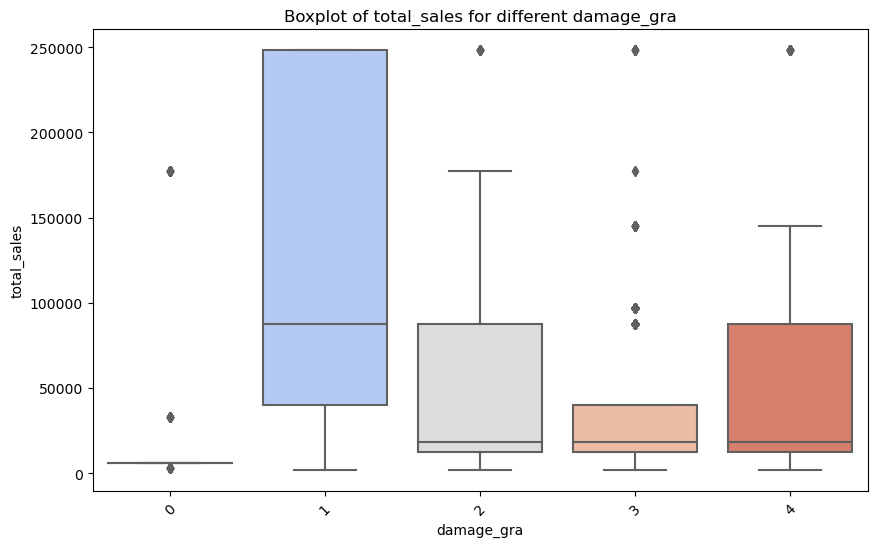

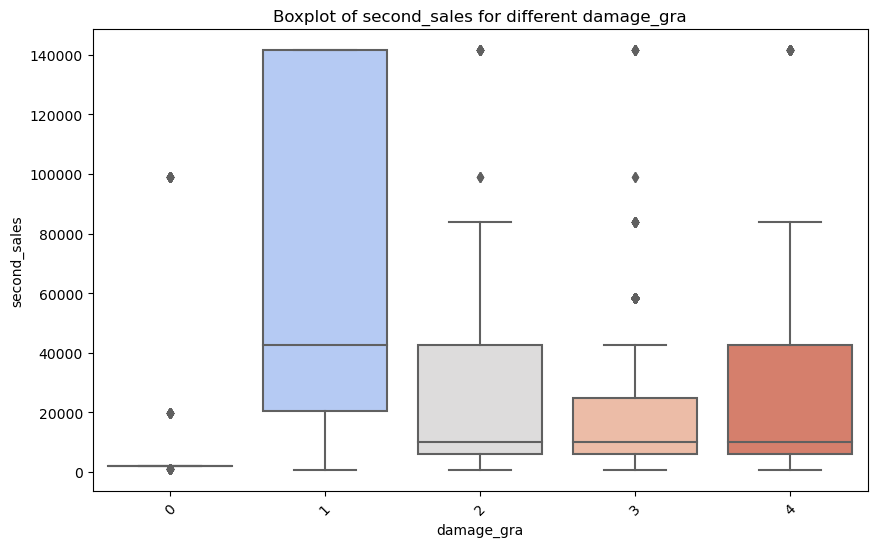

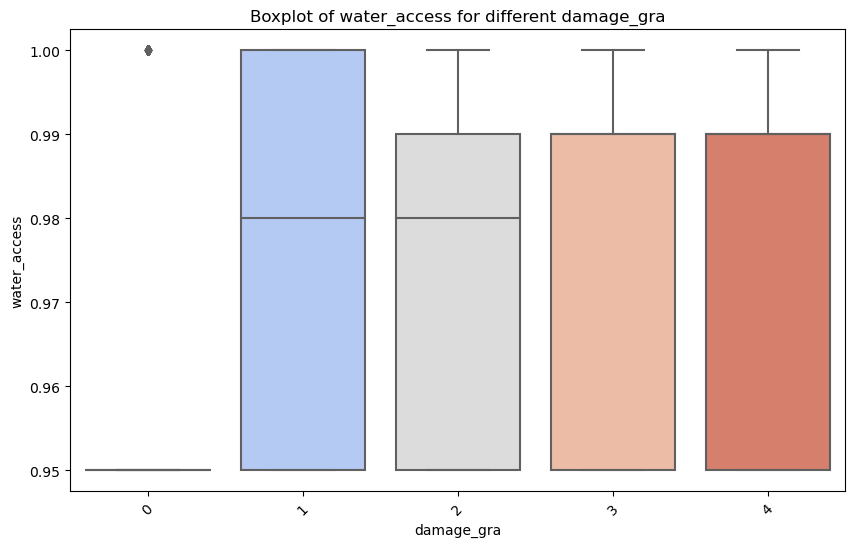

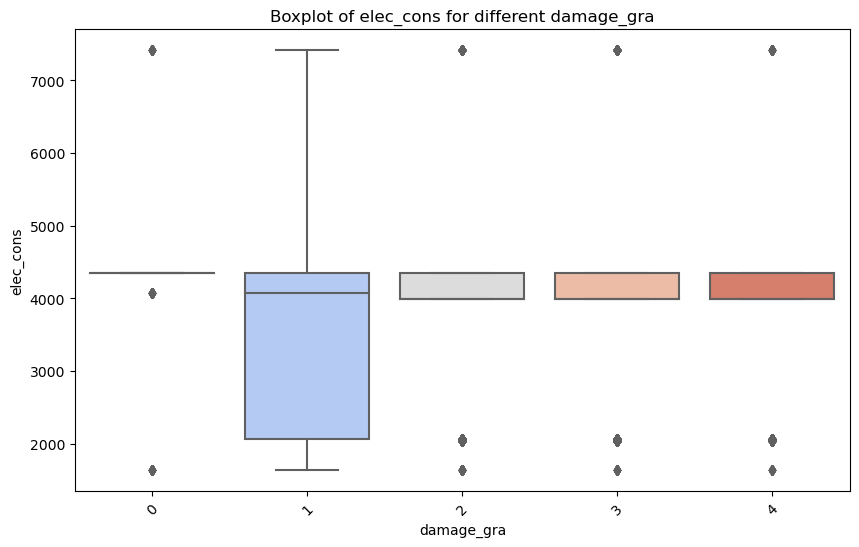

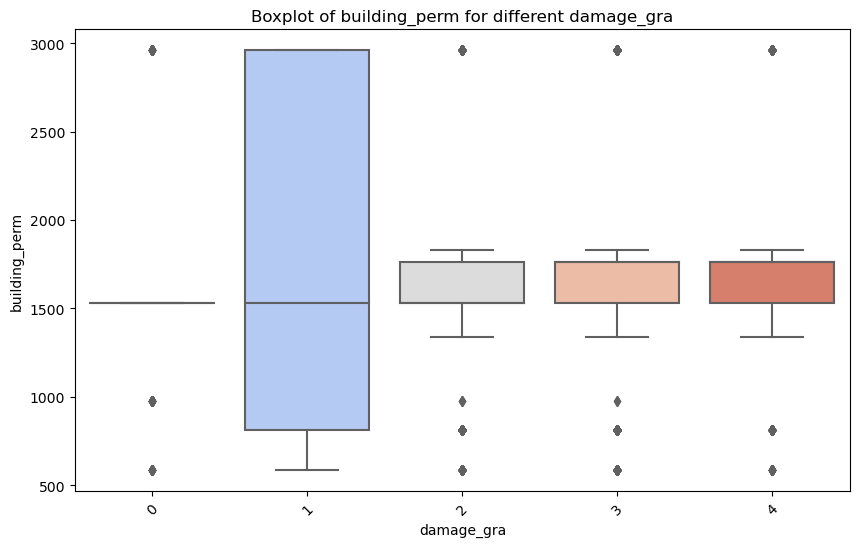

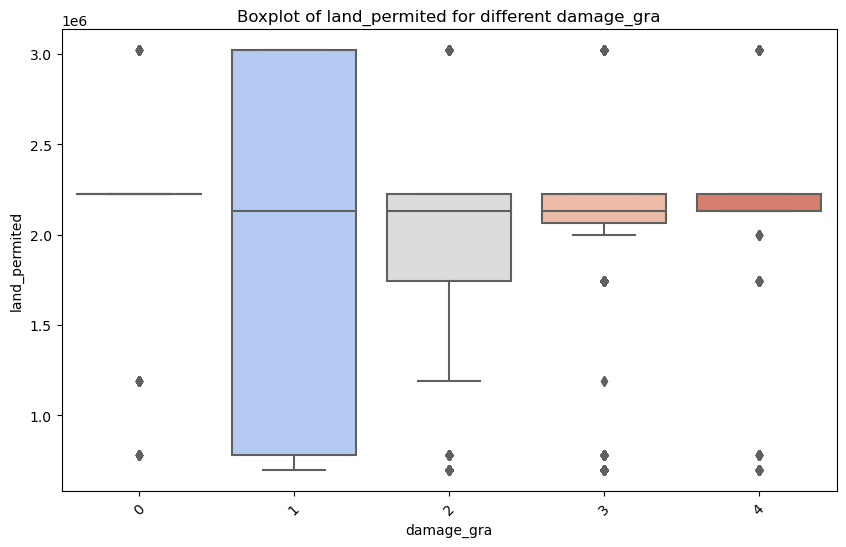

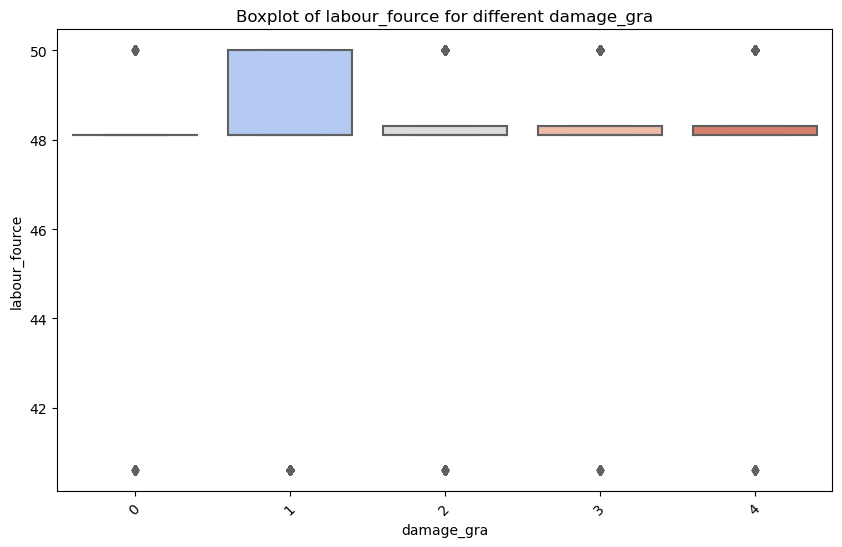

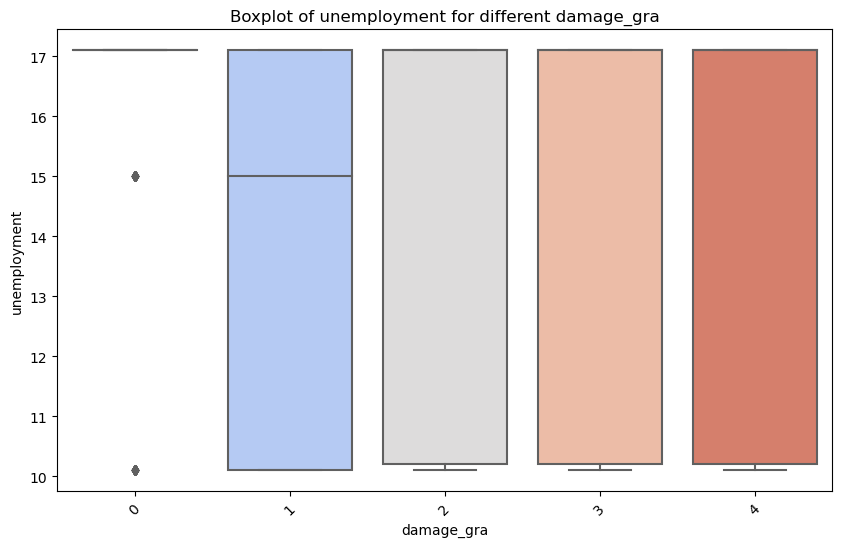

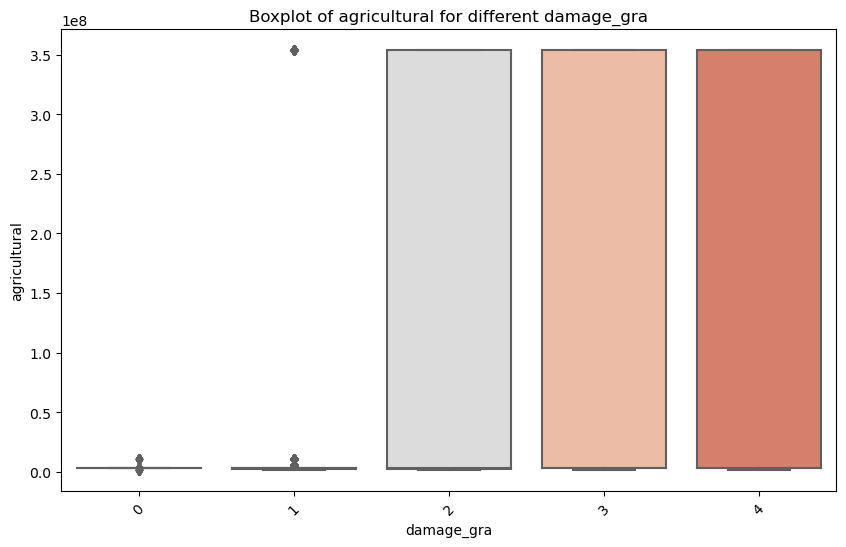

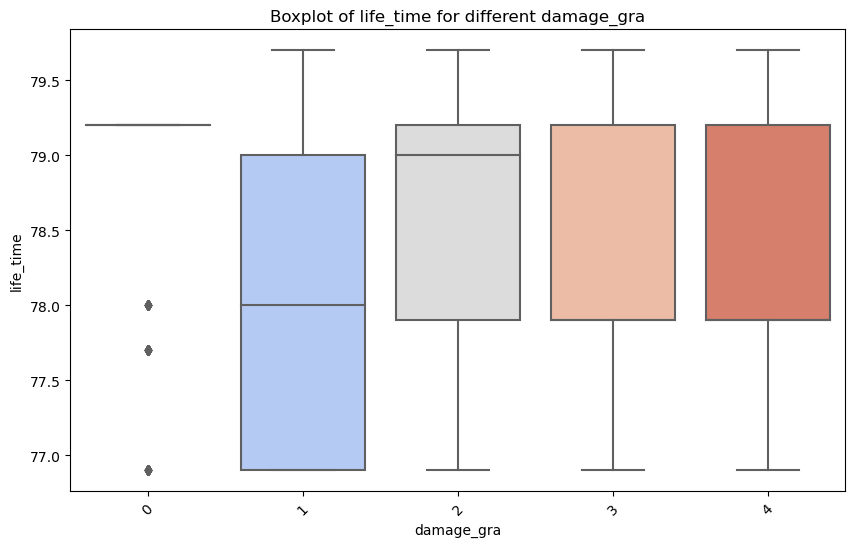

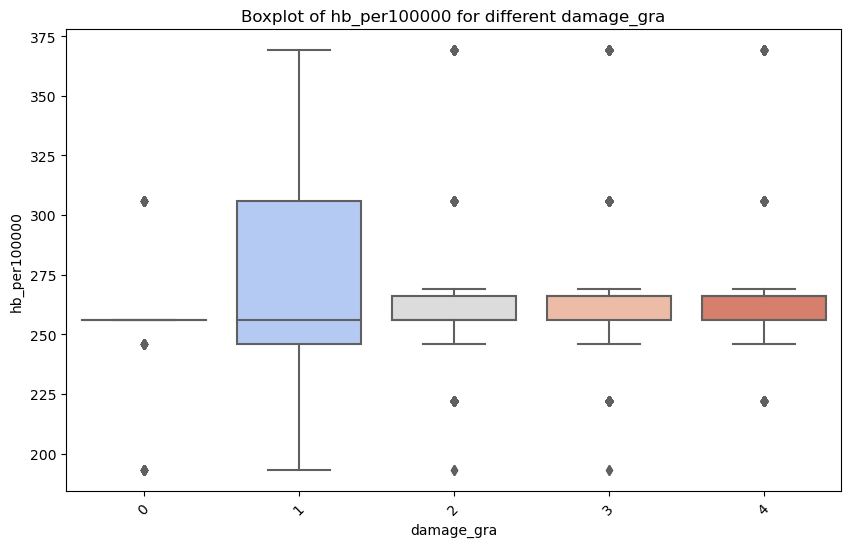

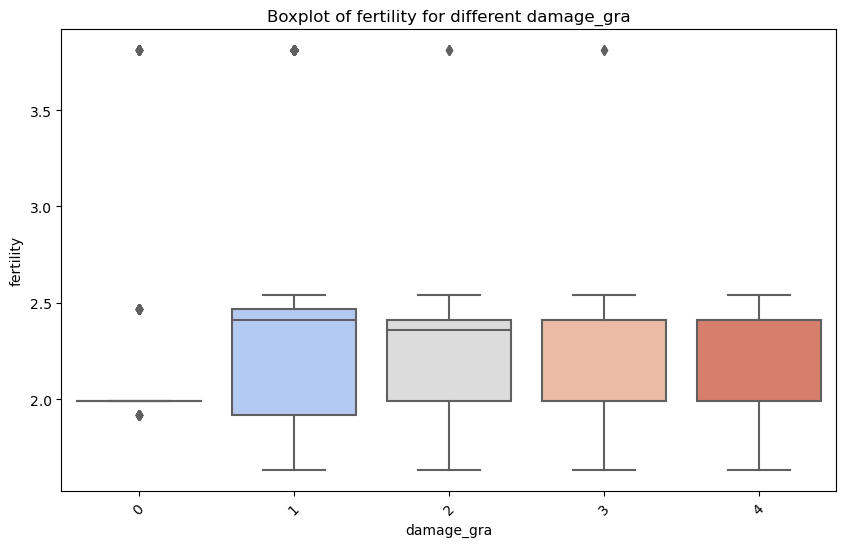

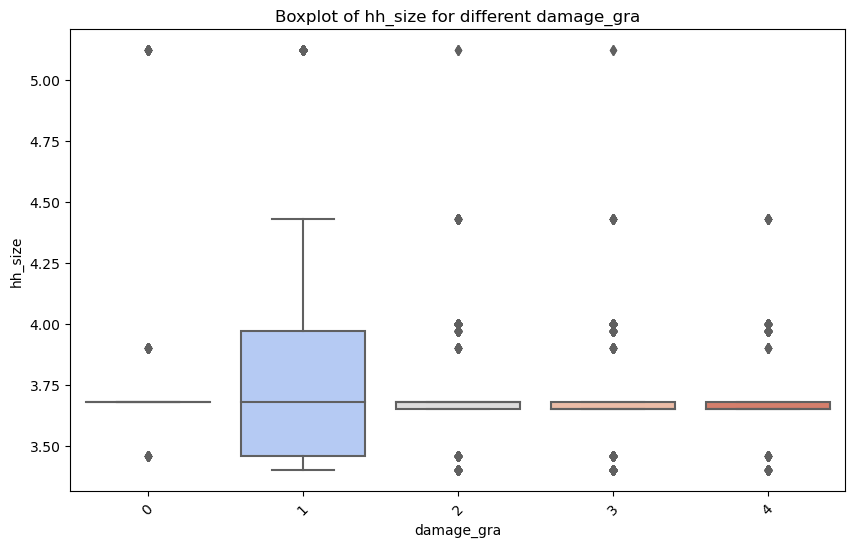

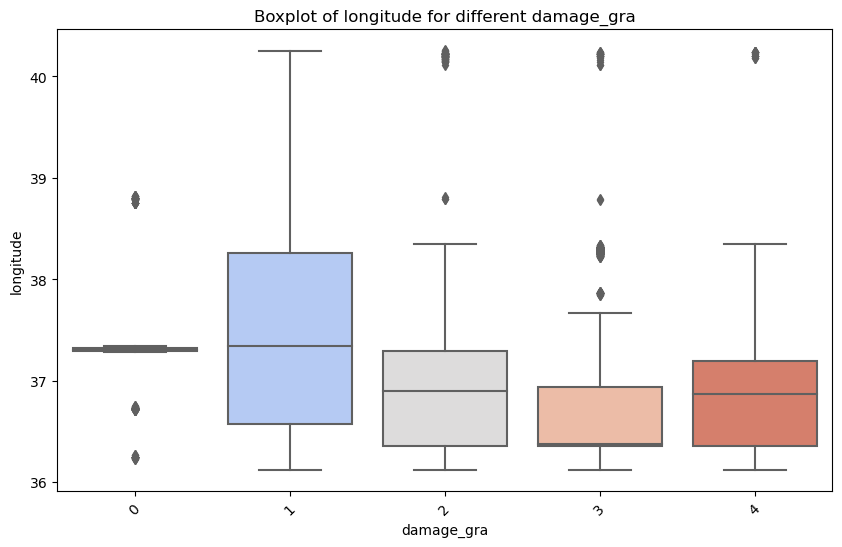

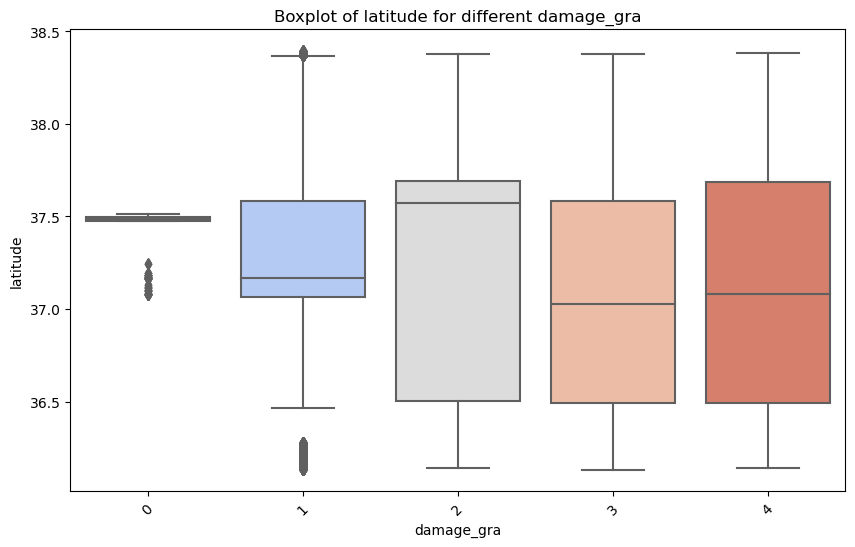

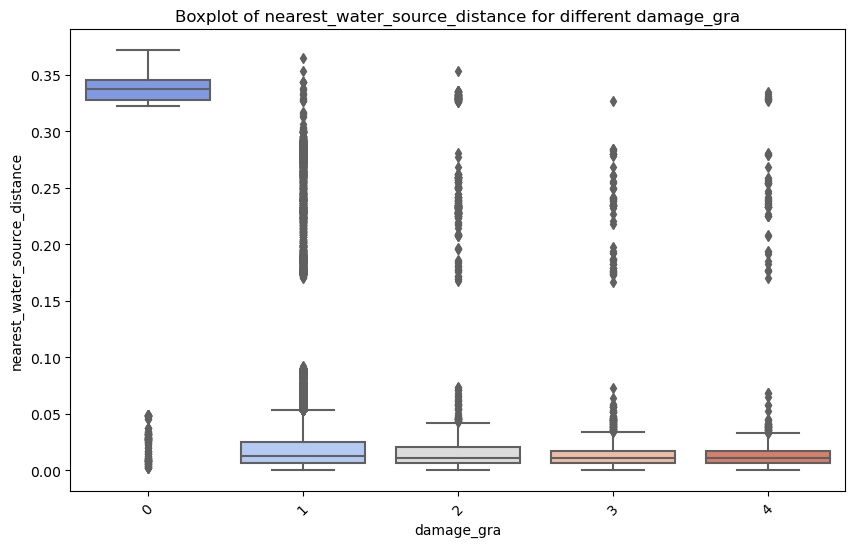

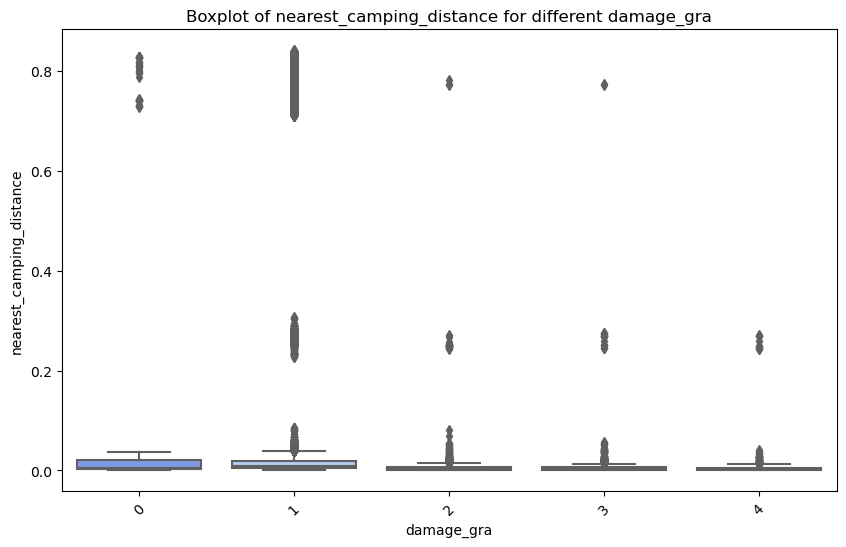

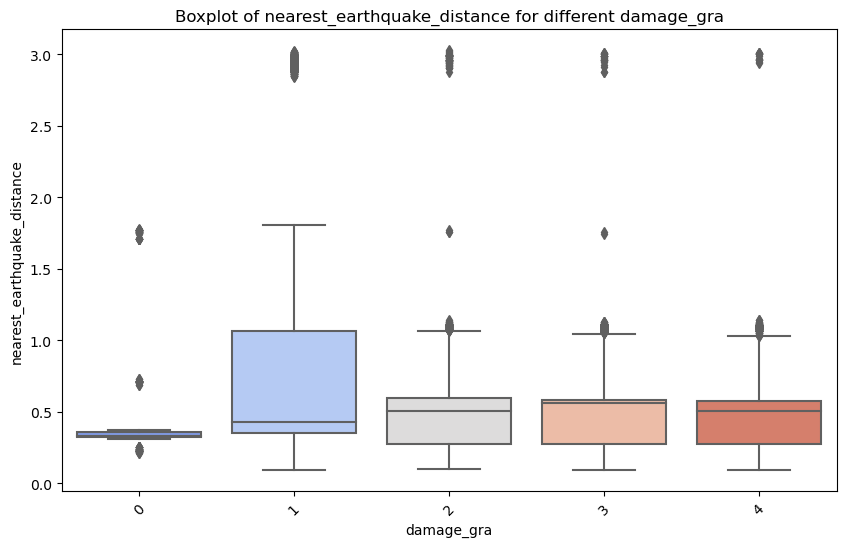

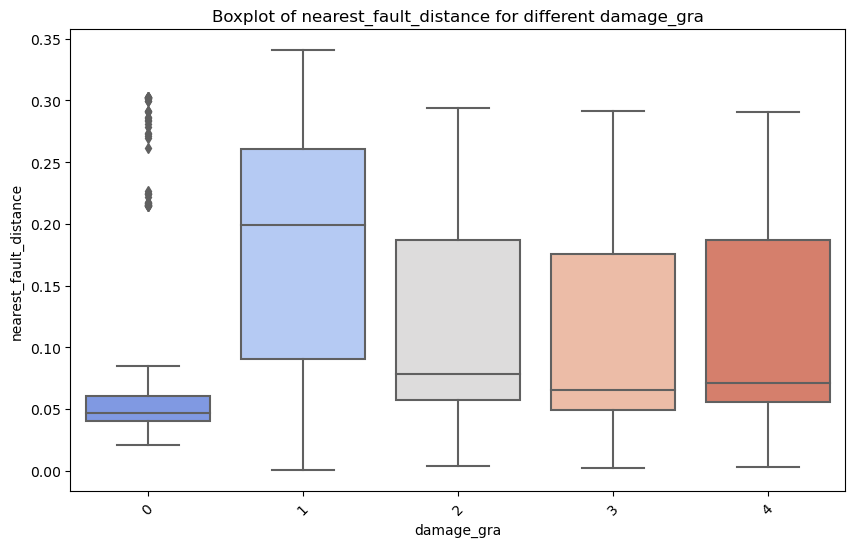

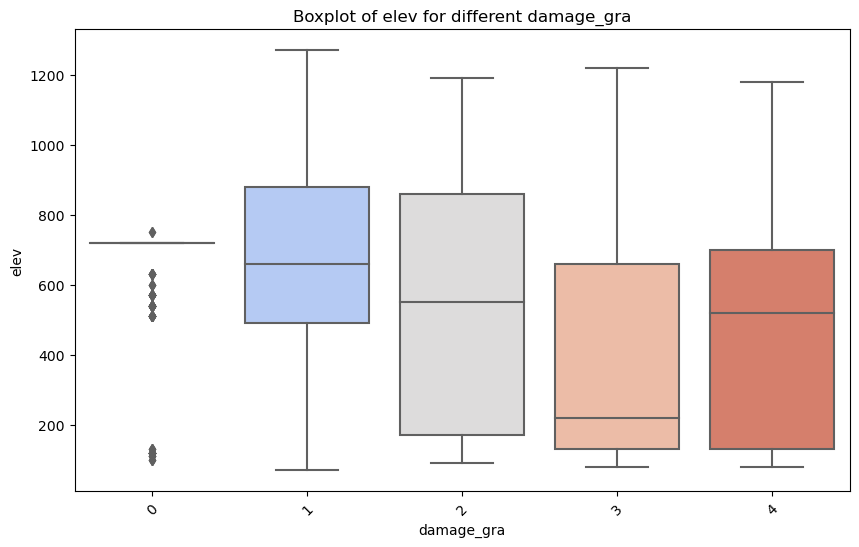

In [16]:



continuous_columns = ['total_sales', 'second_sales', 'water_access', 'elec_cons',
       'building_perm', 'land_permited', 'labour_fource', 'unemployment',
       'agricultural', 'life_time', 'hb_per100000', 'fertility', 'hh_size',
       'longitude', 'latitude', 'nearest_water_source_distance',
       'nearest_camping_distance', 'nearest_earthquake_distance',
       'nearest_fault_distance', 'elev',]

for column in continuous_columns:
    plot_continuous_for_damage_level(data, column, 'damage_gra')

## 6. Variables <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

As por manipulations, in order to use the data in geospatial analisis and we 


In [17]:
# Descriptive Statistics
data.describe()

damage_gra    population        income    total_sales   second_sales  \
count  98795.000000  9.879500e+04  98795.000000   98795.000000   98795.000000   
mean       1.098912  1.064669e+06   6233.025831  111711.594332   62677.151981   
std        0.474627  8.749732e+05   1609.478290   92641.463254   53030.426967   
min        0.000000  2.290400e+04   3012.000000    1588.000000     536.000000   
25%        1.000000  2.854300e+05   5997.000000   32782.000000   19933.000000   
50%        1.000000  8.069360e+05   6256.000000   87599.000000   42683.000000   
75%        1.000000  2.154051e+06   7819.000000  177626.000000   99010.000000   
max        4.000000  2.170110e+06   7819.000000  248121.000000  141434.000000   

       water_access     elec_cons  building_perm  land_permited  \
count  98795.000000  98795.000000    98795.00000   9.879500e+04   
mean       0.974183   4032.042391     1672.67965   1.890747e+06   
std        0.023104   1834.600714      876.38720   8.646228e+05   
min        0.950000   1631.000000      583.00000   6.957180e+05   
25%        0.950000   2060.000000      978.00000   1.189247e+06   
50%        0.980000   4076.000000     1528.00000   2.133640e+06   
75%        1.000000   4343.000000     2959.00000   3.019546e+06   
max        1.000000   7413.000000     2959.00000   3.019546e+06   

       labour_fource  ...  hb_per100000     fertility       hh_size  \
count   98795.000000  ...  98795.000000  98795.000000  98795.000000   
mean       47.794961  ...    267.933630      2.375870      3.898791   
std         2.912563  ...     46.833978      0.598642      0.503712   
min        40.600000  ...    193.000000      1.630000      3.400000   
25%        48.100000  ...    246.000000      1.920000      3.460000   
50%        48.100000  ...    256.000000      2.410000      3.680000   
75%        50.000000  ...    306.000000      2.470000      3.970000   
max        50.000000  ...    369.000000      3.810000      5.120000   

          longitude      latitude  nearest_water_source_distance  \
count  98795.000000  98795.000000                   98795.000000   
mean      37.337438     37.278563                       0.023203   
std        0.890866      0.527023                       0.040275   
min       36.114272     36.128308                       0.000002   
25%       36.566124     37.063683                       0.006774   
50%       37.330824     37.168674                       0.012945   
75%       38.251734     37.585652                       0.025181   
max       40.254908     38.396723                       0.371400   

       nearest_camping_distance  nearest_earthquake_distance  \
count              9.879500e+04                 98795.000000   
mean               1.040666e-01                     0.680512   
std                2.512026e-01                     0.536242   
min                5.749022e-07                     0.088914   
25%                3.891432e-03                     0.342670   
50%                7.726749e-03                     0.429270   
75%                1.712658e-02                     1.056941   
max                8.413472e-01                     3.025931   

       nearest_fault_distance          elev  
count            98795.000000  98795.000000  
mean                 0.176212    625.647401  
std                  0.093218    285.936168  
min                  0.000168     70.000000  
25%                  0.074540    480.000000  
50%                  0.195085    660.000000  
75%                  0.258787    860.000000  
max                  0.340592   1270.000000  

[8 rows x 23 columns]

In [18]:
save_data(data, "dataset2")

Data saved as ../data/processed/dataset2.geojson and ../data/processed/dataset2.pickle
